# Bank Loan Status

## 1. Overview

## 2. Import libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 3. Load the dataset

In [50]:
df = pd.read_csv("loan_data.csv")

## 4. Explore the dataframe

### 4.1. Display first five rows

In [51]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


### 4.2. Shape of the dataframe

In [52]:
df.shape

(381, 13)

### 4.3. Dataframe basic information

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


### 4.4. Statistical summary

In [54]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


## 5. Data cleaning

In [55]:
def wrangler(df):
    # Fill categorical missing values
    cat_cols = ["Gender", "Dependents", "Self_Employed"]
    for cat in cat_cols:
        df[cat] = df[cat].fillna(value=df[cat].mode()[0])

    # Fill numerical missing values
    num_cols = ["Loan_Amount_Term", "Credit_History"]
    for num in num_cols:
        df[num] = df[num].fillna(value=df[num].mode()[0])

    return df

### 5.1. Handle missing values

In [56]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [57]:
df = wrangler(df)

In [58]:
# The missing values are now filled using mode
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### 5.2. Handle duplicates

In [59]:
df.duplicated().sum()

np.int64(0)

### 5.3. Drop irrelevant columns

In [60]:
df.drop(columns=["Loan_ID"], inplace=True)

### 5.4. Check for data inconsistency

In [61]:
def getUnique(col):
    return col.unique()
    
df.select_dtypes(include='object').apply(getUnique, axis=0)

Gender                      [Male, Female]
Married                          [Yes, No]
Dependents                   [1, 0, 2, 3+]
Education         [Graduate, Not Graduate]
Self_Employed                    [No, Yes]
Property_Area    [Rural, Urban, Semiurban]
Loan_Status                         [N, Y]
dtype: object

## 6. Data preprocessing

### 6.1 Convert categorical columns

In [62]:
# Perform binary encoding for "Loan_Status" and convert type to int8
df["Loan_Status"] = df["Loan_Status"].replace({'Y': 1, 'N': 0}).astype('int8')

C:\Users\Kenwrick Espinosa\AppData\Local\Temp\ipykernel_2944\2921068105.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Loan_Status"] = df["Loan_Status"].replace({'Y': 1, 'N': 0}).astype('int8')


In [63]:
# Perform binary encoding for "Gender" and convert type to int8
df["Gender"] = df["Gender"].replace({'Male': 1, 'Female': 0}).astype('int8')
# Perform binary encoding for "Married" and convert type to int8
df["Married"] = df["Married"].replace({'Yes': 1, 'No': 0}).astype('int8')

C:\Users\Kenwrick Espinosa\AppData\Local\Temp\ipykernel_2944\3163719603.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace({'Male': 1, 'Female': 0}).astype('int8')
C:\Users\Kenwrick Espinosa\AppData\Local\Temp\ipykernel_2944\3163719603.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Married"] = df["Married"].replace({'Yes': 1, 'No': 0}).astype('int8')


In [64]:
# Convert "Dependents" to type int
def process_dependents(value):
    try:
        x = int(value.replace("+", "")) if "+" in str(value) else int(value)
        return (3 if (x >= 3) else x)
    except:
        return 0

df["Dependents"] = df['Dependents'].map(process_dependents).astype('int8')

In [65]:
# Perform binary encoding for "Graduate" and convert to type int8
df["Education"] = df["Education"].replace({"Graduate": 1, "Not Graduate": 0}).astype('int8')

C:\Users\Kenwrick Espinosa\AppData\Local\Temp\ipykernel_2944\3103245689.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Education"] = df["Education"].replace({"Graduate": 1, "Not Graduate": 0}).astype('int8')


In [66]:
# Perform binary encoding for "Self_Employed" and convert to type int8
df["Self_Employed"] = df["Self_Employed"].replace({"Yes": 1, "No": 0}).astype('int8')

C:\Users\Kenwrick Espinosa\AppData\Local\Temp\ipykernel_2944\1167378752.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Self_Employed"] = df["Self_Employed"].replace({"Yes": 1, "No": 0}).astype('int8')


In [67]:
df["ApplicantIncome"] = df["ApplicantIncome"].astype('float64')

### 6.2. Dealing with outliers

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>, <Axes: >]], dtype=object)

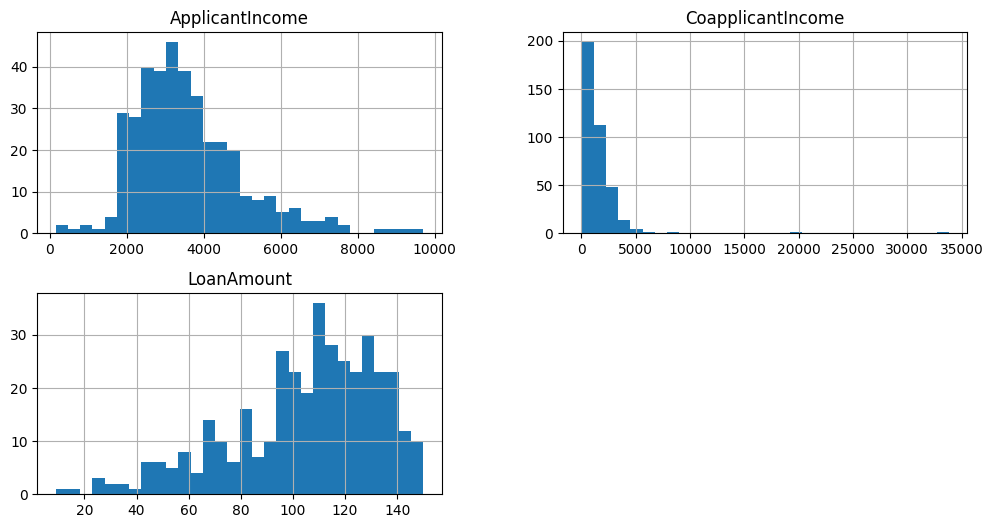

In [68]:
df[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]].hist(bins=30, figsize=(12, 6))

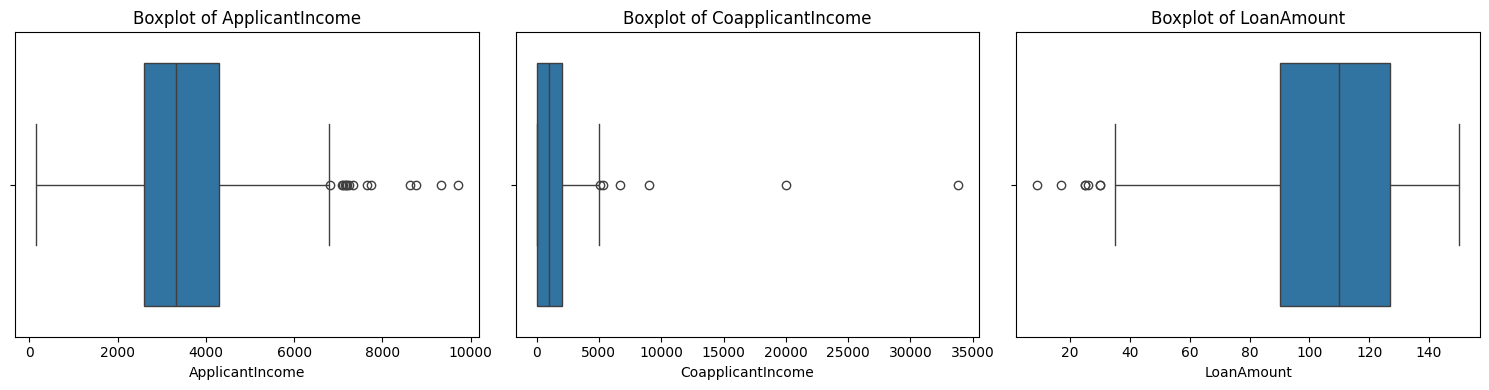

In [69]:
plt.figure(figsize=(15, 4))

for i, col in enumerate(["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [70]:
df["ApplicantIncome"].describe(percentiles=[.01, .25, .5, .75, .95, .99])

count     381.000000
mean     3579.845144
std      1419.813818
min       150.000000
1%       1020.000000
25%      2600.000000
50%      3333.000000
75%      4288.000000
95%      6250.000000
99%      7916.800000
max      9703.000000
Name: ApplicantIncome, dtype: float64

In [71]:
# It shows statistical outliers beyond the 99th percentile
df["CoapplicantIncome"].describe(percentiles=[.01, .25, .5, .75, .95, .99])

count      381.000000
mean      1277.275381
std       2340.818114
min          0.000000
1%           0.000000
25%          0.000000
50%        983.000000
75%       2016.000000
95%       3440.000000
99%       5574.800000
max      33837.000000
Name: CoapplicantIncome, dtype: float64

In [72]:
# I use 10000 as threshold
(df["CoapplicantIncome"].loc[df["CoapplicantIncome"] > 10000]).count()

np.int64(2)

In [73]:
cap = df["CoapplicantIncome"].quantile(0.99)
df["CoapplicantIncome"] = np.where(df["CoapplicantIncome"] > cap, cap, df["CoapplicantIncome"])

In [74]:
df["LoanAmount"].describe(percentiles=[.01, .25, .5, .75, .95, .99])

count    381.000000
mean     104.986877
std       28.358464
min        9.000000
1%        25.800000
25%       90.000000
50%      110.000000
75%      127.000000
95%      142.000000
99%      150.000000
max      150.000000
Name: LoanAmount, dtype: float64

## 7. Basic feature engineering

### 7.1. Creating Total_Income feature

In [75]:
# Represent household financial capability
df["Total_Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]

## 8. Data Modeling

### 8.1. Separated feature and target

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    int8   
 1   Married            381 non-null    int8   
 2   Dependents         381 non-null    int8   
 3   Education          381 non-null    int8   
 4   Self_Employed      381 non-null    int8   
 5   ApplicantIncome    381 non-null    float64
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    float64
 9   Credit_History     381 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    int8   
 12  Total_Income       381 non-null    float64
dtypes: float64(6), int8(6), object(1)
memory usage: 23.2+ KB


In [77]:
X = df.drop(columns=["Loan_Status"])
y = df["Loan_Status"]

### 8.2. Data splitting

In [78]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 8.3. Additional preprocessing

In [84]:
num_features = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount",
                "Loan_Amount_Term", "Credit_History",
                "Total_Income"]

cat_features = ["Property_Area"]

In [89]:
preprocessor = ColumnTransformer([
    ("numerical features", StandardScaler(), num_features),
    ("categorical features", OneHotEncoder(), cat_features)
], remainder='passthrough')

### 8.4. Creating pipeline

In [90]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression())
])

### 8.5 Training the model

In [92]:
pipeline.fit(X_train, y_train)

C:\Users\Kenwrick Espinosa\AppData\Roaming\Python\Python311\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical features',
                                                  StandardScaler(),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History',
                                                   'Total_Income']),
                                                 ('categorical features',
                                                  OneHotEncoder(),
                                                  ['Property_Area'])])),
                ('model', LogisticRegression())])

In [95]:
y_pred = pipeline.predict(X_test)